## ProjF2 - Data Exploration

Use this document as a template to provide some exploratory analysis of your data similar to the one in ProjC1. You are welcome to go in as much depth as needed.

Make sure you keep the sections specified in this template, but you are welcome to add more cells with your code or explanation as needed.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Load and Visualize Data

Let's start by loading your entire dataset or a sample if it is a larger dataset.

In [3]:
import pandas as pd

df = pd.read_json('/content/drive/MyDrive/NNDL_Project/IMDB_reviews.json', lines=True)


In [4]:
print("Shape of Data:", df.shape, "\n\n")

df.head()

Shape of Data: (573913, 7) 




,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


In [5]:
#Overall Desciption of Dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573913 entries, 0 to 573912
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   review_date     573913 non-null  object
 1   movie_id        573913 non-null  object
 2   user_id         573913 non-null  object
 3   is_spoiler      573913 non-null  bool  
 4   review_text     573913 non-null  object
 5   rating          573913 non-null  int64 
 6   review_summary  573913 non-null  object
dtypes: bool(1), int64(1), object(5)
memory usage: 26.8+ MB
None


Provide some visualization of the data. For example,
- If your data is time series, you can plot a sequence and the response or label.
- If tabular data, you can plot histograms of the data.
- If working with image recognition or segmentation, you can show an image and the corresponding output.
- If it is a video that you are processing, just show screenshots.
- If doing something with reinforcement learning, you can provide samples of the simulation environment used.

<Axes: title={'center': 'Number of positive and negative samples in the dataset'}>

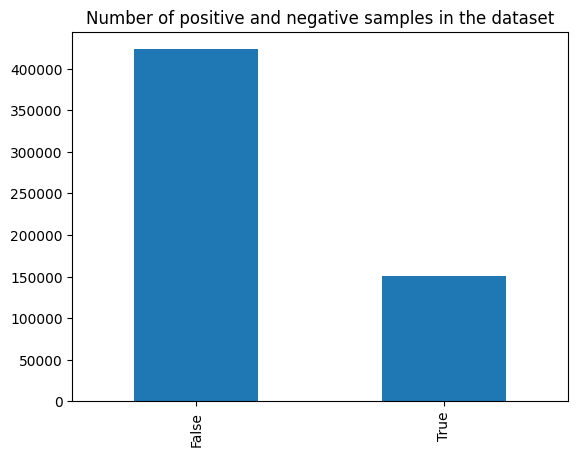

In [6]:
#Print distribution of output class (is_spoiler), which has two values, True and False
fig = plt.figure()
plt.title("Number of positive and negative samples in the dataset")
df['is_spoiler'].value_counts().plot(kind='bar')

<Axes: title={'center': 'Number of reviews by ratings'}>

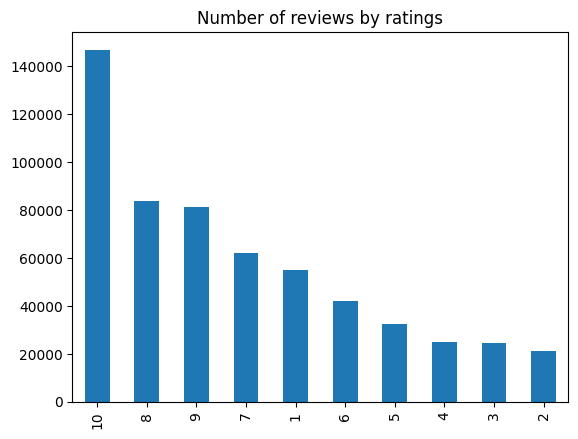

In [7]:
#Number of reviews grouped by the rating given by the user.
plt.title("Number of reviews by ratings")
df['rating'].value_counts().plot(kind='bar')

### 2. Compute Some Statistics from your Data

First, extract some characterisitics about the input (e.g., image size, means and standard deviation of values, sample frequency).

In [11]:
#Since our dataset is huge, we will use 10,000 positive samples and 10,000 negative samples as a subset for our analysis.

positives = df[df['is_spoiler']==True]
negatives = df[df['is_spoiler']==False]

df_analysis = pd.concat([positives.sample(10000), negatives.sample(10000)])

<Axes: title={'center': 'Sample Dataset by output labels'}>

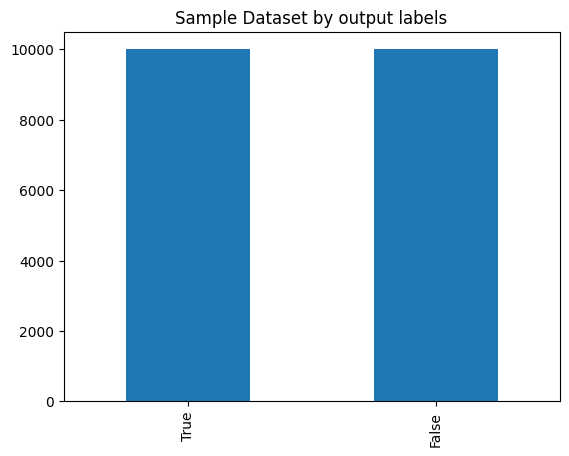

In [14]:
#We can show a plot of the ouptut label distribution to make sure that we have equal number of samples of each class.
plt.title("Sample Dataset by output labels")
df_analysis['is_spoiler'].value_counts().plot(kind='bar')

In [17]:
#We can calculate statistics such as the average number of words per review,
#average ratings for movies, and group them by the output class to see if there is any relation between the two.

df_analysis['num_words'] = df_analysis['review_text'].apply(lambda x : len(x.split(" ")))
df_analysis.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary,num_words
227749,16 February 2015,tt2322441,ur19573571,True,From my side its hard to describe best or wors...,1,"That is not only not right, it is not even wrong!",254
525383,6 December 2003,tt0117381,ur2875232,True,This movie was generally good and the plot was...,7,A few things I don't understand,163
378494,16 December 2005,tt0360717,ur6032039,True,"I had VERY high hopes for this film, and I was...",2,Overindulgent and Overlong,238
224850,5 June 2016,tt2488496,ur43176624,True,"Warning, spoilers.So, the movie started off we...",1,puddu!,485
235493,27 September 2015,tt2126355,ur6381509,True,"As I have watched nearly all ""Disaster-Blockbu...",10,Best disaster movie ever,99


In [19]:
#We try and see if there is a relation between the number of average
#number of words in a review text and the probability of it containing a spoiler.

df_analysis.groupby('is_spoiler')['num_words'].mean()

#Thus, we can see that reviews with spoilers are generally longer (by almost 100 words).

is_spoiler
False    232.2195
True     332.4715
Name: num_words, dtype: float64

In [20]:
#Next, we can see if there is a correlation between the ratings given by reviewers
#and whether it contains a spoiler.

df_analysis.groupby('is_spoiler')['rating'].mean()

#Thus, we see that there is not a strong correlation between the two.

is_spoiler
False    7.1194
True     6.5046
Name: rating, dtype: float64

Next, provide some characteristics about your output (e.g., histograms, spatial distribution of bounding boxes in the case of object detection, etc.). In the case of cases such as tasks such as reinforcement learning, you can provide details about the desired output and rewards used. You can show some correlations between inputs and outputs if possible.

In [22]:
#Since we are working with Text data, we can try and see if there are some
#common words that are used in reviews that are classified as spoilers.
#Some words that occur most commonly in spoilers are "spoiler", "plot twist", "death", "alert" etc.
#We analyze the occurrence of these words in our sample dataset.

def review_by_word(df, word):
  col = 'has_'+str(word)
  df[col] = df['review_text'].apply(lambda x : word.lower() in x.lower())
  df[df[col]==True]['is_spoiler'].value_counts().plot(kind='bar')
  plt.show()



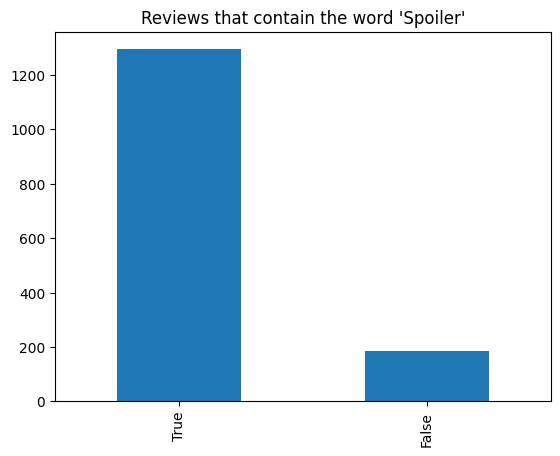

In [32]:
#Checking reviews that contain the word 'Spoiler'
plt.title("Reviews that contain the word 'Spoiler'")
review_by_word(df_analysis, 'spoiler')

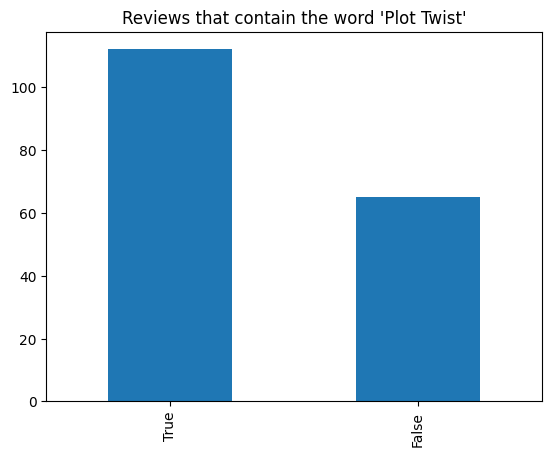

In [35]:
#Checking reviews that contain the word 'Plot Twist'
plt.title("Reviews that contain the word 'Plot Twist'")
review_by_word(df_analysis, 'plot twist')

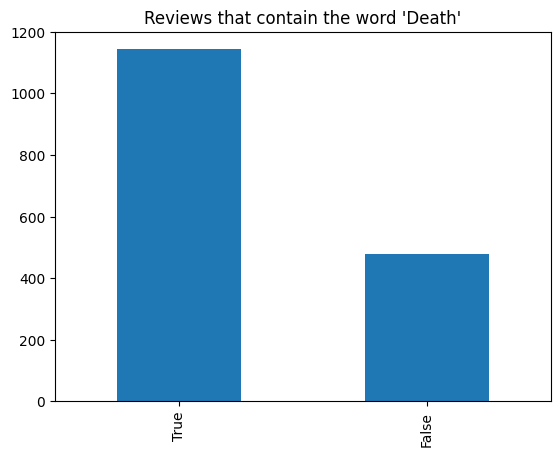

In [40]:
#Checking reviews that contain the word 'death'
plt.title("Reviews that contain the word 'Death'")
review_by_word(df_analysis, 'death')

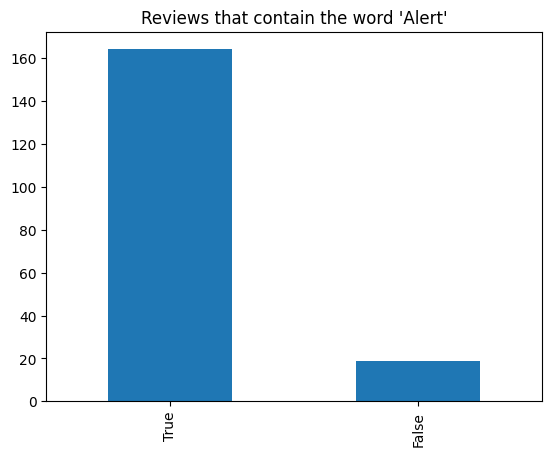

In [41]:
#Checking reviews that contain the word 'alert'
plt.title("Reviews that contain the word 'Alert'")
review_by_word(df_analysis, 'alert')

### 3. Comment on Your Data

Answer these questions as appropriate?
- Is your data balanced?
- Are there disparities in your input data? Does it show some specific patterns?

From our data, we can see that it is imbalanced. There are a lot more negative samples (reviews that do not contain spoilers), than positive samples. Thus, we will have to take that into consideration while training. But, since our dataset is massive, we might not have to try and balance the data too much, since we have more than 100,000 positive samples as well.

Next, we also saw that there seems to be a relation between the review length(number of words in a review) and whether it contains a spoiler or not. We can use this information while training our model.

Finally, we saw how some words, such as 'spoiler', 'death', 'plot twist' etc. are more commonly found in reviews that contain spoilers than those that don't. We can use this information as well to train our model more efficiently.

`### Comment here`